In [8]:
##Initial data import


from sklearn.cluster import AgglomerativeClustering
import numpy as np

with open('WHO-COVID-19-global-data.csv','r') as f:
    raw = [row.replace(', including east Jerusalem','').replace('Kosovo[1]','Kosovo').replace('\n','').split(',') for row in f.readlines()]
Mortality_Data = raw[1:] 

with open('vaccination-data.csv','r') as f:
    raw = [row.replace('occupied Palestinian territory','"occupied Palestinian territory"').replace('\n','').split(',')[:11] for row in f.readlines()]
Vax_Data = raw[1:]

with open('vaccination-data.csv','r') as f:
    raw = [row.replace('occupied Palestinian territory','"occupied Palestinian territory"').replace('\n','').split(',')[-1] for row in f.readlines()]  
Vax_Data_Right = raw[1:] ##Vaccination data file has a column with a variable amount of commas, making split by comma difficult; this grabs the furthest right column, to be appended later on.

with open('vaccination-data.csv','r') as f:
    raw = [row.replace('occupied Palestinian territory','"occupied Palestinian territory"').replace('\n','').split(',')[:3] for row in f.readlines()]  
Region_Data = raw[1:]

In [9]:
for i in range(len(Vax_Data)):
    Vax_Data[i].append(Vax_Data_Right[i])

Vax_Nations = []
for items in Vax_Data:
    Vax_Nations.append(items[0])

    
Nations_Union = []
for items in Mortality_Data:
    if int(items[5])>0 and items[2] in Vax_Nations:
        Nations_Union.append(items[2])
Unique_Nations_Union = np.unique(Nations_Union) ##List of nations that are common to both files

In [10]:
Case_Counts_Timeline = []
Death_Counts_Timeline = []
Mortality_Rates = []
Nation_Data = []
Vax_Amount = []
Boost_Amount = []
Region_List = []

for X in Unique_Nations_Union:
    for Y in Mortality_Data:
        if Y[2]==X:
                Case_Counts_Timeline.append(int(Y[5])) #Mortality data set has multiple rows for each country; this builds a list of case counts for each country, and the maximum is later used.
                Death_Counts_Timeline.append(int(Y[7]))
    Mortality_Rates.append(np.max(Death_Counts_Timeline)/np.max(Case_Counts_Timeline))  #Calculate mortality rate
    Case_Counts_Timeline = [] #Reset timeline lists
    Death_Counts_Timeline = []
    for Z in Vax_Data:
        if Z[0]==X:
            if Z[10] == '': Vax_Float = float(0) #replace blanks with zero
            else:
                Vax_Float = float(Z[10])
            Vax_Amount.append(Vax_Float) #List of vaccionation rates per 100
            if Z[11] == '': Boost_Float = float(0)
            else:
                Boost_Float = float(Z[11])
            Boost_Amount.append(Boost_Float) #List of boost rates per 100
    for W in Region_Data:
        if W[0]==X:
            Region_List.append(W[2]) #list of regions
                

    
for i in range(len(Unique_Nations_Union)):
    Nation_Data.append([Vax_Amount[i], Boost_Amount[i], Mortality_Rates[i]]) #List for clustering, three features selected    

In [11]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3).fit(Nation_Data)
K   = []
for i in range(len(Unique_Nations_Union)):
    K += [[Unique_Nations_Union[i],cluster.labels_[i],Region_List[i]]]
    if cluster.labels_[i]==1:print(Unique_Nations_Union[i])

American Samoa
Andorra
Argentina
Australia
Austria
Bahrain
Belgium
Bermuda
Bhutan
Bonaire
Brazil
Brunei Darussalam
Cambodia
Canada
Cayman Islands
Chile
China
Cook Islands
Costa Rica
Cuba
Cyprus
Czechia
Denmark
Ecuador
Faroe Islands
Finland
France
Germany
Gibraltar
Greece
Guam
Hungary
Iceland
Ireland
Isle of Man
Italy
Japan
Jersey
Kuwait
Liechtenstein
Luxembourg
Malaysia
Malta
Mauritius
Mexico
Nauru
Netherlands
New Zealand
Niue
Northern Mariana Islands (Commonwealth of the)
Norway
Palau
Panama
Peru
Portugal
Puerto Rico
Qatar
Republic of Korea
Saba
Samoa
San Marino
Saudi Arabia
Seychelles
Singapore
Spain
Sri Lanka
Sweden
Switzerland
Thailand
Tonga
United Arab Emirates
Uruguay
Viet Nam


C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


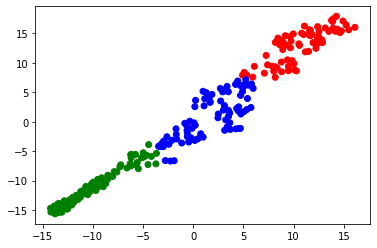

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plot

colors=[]
for items in K:
    if items[1]==0:
        colors.append('green')
    else:
        if items[1]==1:
            colors.append('red')
        else:
            colors.append('blue')
embed  = TSNE(n_components=2).fit_transform(Nation_Data)
plot.scatter(embed[:,0],embed[:,1],c=colors)
plot.show()

In [20]:
#Summarize class by region

AMRO0=AMRO1=AMRO2=WPRO0=WPRO1=WPRO2=EMRO0=EMRO1=EMRO2=EURO0=EURO1=EURO2=SEARO0=SEARO1=SEARO2=AFRO0=AFRO1=AFRO2=OTHER0=OTHER1=OTHER2=0

for items in K:
    if items[2]=='AMRO' and items[1] == 0:
        AMRO0+=1
    if items[2]=='AMRO' and items[1] == 1:
        AMRO1+=1
    if items[2]=='AMRO' and items[1] == 2:
        AMRO2+=1  
    if items[2]=='WPRO' and items[1] == 0:
        WPRO0+=1
    if items[2]=='WPRO' and items[1] == 1:
        WPRO1+=1
    if items[2]=='WPRO' and items[1] == 2:
        WPRO2+=1     
    if items[2]=='EMRO' and items[1] == 0:
        EMRO0+=1
    if items[2]=='EMRO' and items[1] == 1:
        EMRO1+=1
    if items[2]=='EMRO' and items[1] == 2:
        EMRO2+=1   
    if items[2]=='EURO' and items[1] == 0:
        EURO0+=1
    if items[2]=='EURO' and items[1] == 1:
        EURO1+=1
    if items[2]=='EURO' and items[1] == 2:
        EURO2+=1   
    if items[2]=='SEARO' and items[1] == 0:
        SEARO0+=1
    if items[2]=='SEARO' and items[1] == 1:
        SEARO1+=1
    if items[2]=='SEARO' and items[1] == 2:
        SEARO2+=1           
    if items[2]=='AFRO' and items[1] == 0:
        AFRO0+=1
    if items[2]=='AFRO' and items[1] == 1:
        AFRO1+=1
    if items[2]=='AFRO' and items[1] == 2:
        AFRO2+=1
    if items[2]=='OTHER' and items[1] == 0:
        OTHER0+=1
    if items[2]=='OTHER' and items[1] == 1:
        OTHER1+=1
    if items[2]=='OTHER' and items[1] == 2:
        OTHER2+=1
print('Region: Class 0 | Class 1 | Class 2')        
print('Americas: ' + str(AMRO0) + ' | ' + str(AMRO1) + ' | ' + str(AMRO2))
print('Europe: ' + str(EURO0) + ' | ' + str(EURO1) + ' | ' + str(EURO2))
print('Africa: ' + str(AFRO0) + ' | ' + str(AFRO1) + ' | ' + str(AFRO2))
print('Southeast Asia: ' + str(SEARO0) + ' | ' + str(SEARO1) + ' | ' + str(SEARO2))
print('Eastern Mediterranean: ' + str(EMRO0) + ' | ' + str(EMRO1) + ' | ' + str(EMRO2))
print('Western Pacific: ' + str(WPRO0) + ' | ' + str(WPRO1) + ' | ' + str(WPRO2))
print('Other: ' + str(OTHER0) + ' | ' + str(OTHER1) + ' | ' + str(OTHER2))
print('Total: ' + str(AMRO0+EURO0+AFRO0+SEARO0+EMRO0+WPRO0+OTHER0)+ ' | ' +str(AMRO1+EURO1+AFRO1+SEARO1+EMRO1+WPRO1+OTHER1)+ ' | ' + str(AMRO2+EURO2+AFRO2+SEARO2+EMRO2+WPRO2+OTHER2))

Region: Class 0 | Class 1 | Class 2
Americas: 7 | 16 | 29
Europe: 9 | 27 | 23
Africa: 39 | 2 | 5
Southeast Asia: 0 | 3 | 7
Eastern Mediterranean: 11 | 5 | 6
Western Pacific: 2 | 19 | 12
Other: 0 | 1 | 0
Total: 68 | 73 | 82


In [18]:
#Calculate averages by class

Class0M = 0
Class1M = 0
Class2M = 0
Class0V = 0
Class1V = 0
Class2V = 0
Class0B = 0
Class1B = 0
Class2B = 0
Class0L = 0
Class1L = 0
Class2L = 0

for i in range(len(K)):
    if K[i][1] == 0:
        Class0L+=1
        Class0M+=Nation_Data[i][2]
        Class0V+=Nation_Data[i][0]
        Class0B+=Nation_Data[i][1]
        
    if K[i][1] == 1:
        Class1L+=1
        Class1M+=Nation_Data[i][2]
        Class1V+=Nation_Data[i][0]
        Class1B+=Nation_Data[i][1]

    if K[i][1] == 2:
        Class2L+=1
        Class2M+=Nation_Data[i][2]
        Class2V+=Nation_Data[i][0]
        Class2B+=Nation_Data[i][1]

print('Averages by Class')
print('Statistic: Class 0 | Class 1 | Class 2')
print('Mortality: ' + str(Class0M/Class0L) + ' | ' + str(Class1M/Class1L) + ' | ' + str(Class2M/Class2L))
print('Vaccination Rate: ' + str(Class0V/Class0L) + ' | ' + str(Class1V/Class1L) + ' | ' + str(Class2V/Class2L))
print('Boost Rate: ' + str(Class0B/Class0L) + ' | ' + str(Class1B/Class1L) + ' | ' + str(Class2B/Class2L))
        

Averages by Class
Statistic: Class 0 | Class 1 | Class 2
Mortality: 0.022277346595543007 | 0.007640139027198891 | 0.01153669047565708
Vaccination Rate: 18.98783823529412 | 80.58468493150686 | 56.813097560975564
Boost Rate: 1.7810441176470584 | 54.06071232876712 | 15.937951219512195
